In [19]:
!wget https://raw.githubusercontent.com/WuChenDi/Audio-Processing/main/audios/mmmm.mov -O "sample_data/mmmm.mov"

--2025-06-11 12:51:21--  https://raw.githubusercontent.com/WuChenDi/Audio-Processing/main/audios/mmmm.mov
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39310 (38K) [video/quicktime]
Saving to: ‘sample_data/mmmm.mov’

sample_data/mmmm.mo 100%[===================>]  38.39K  --.-KB/s    in 0.008s  

2025-06-11 12:51:21 (4.65 MB/s) - ‘sample_data/mmmm.mov’ saved [39310/39310]



In [20]:
!ls "sample_data"

anscombe.json		      mmmm.mov		     README.md
california_housing_test.csv   mnist_test.csv
california_housing_train.csv  mnist_train_small.csv


In [3]:
!python -m pip install librosa scipy numpy matplotlib

In [10]:
import numpy as np
import librosa
import scipy.signal as signal
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf

<ipython-input-27-61704561>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=sr)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Audio loaded successfully, sampling rate: 22050 Hz, length: 91136 samples
Playing Original Audio


Playing Filtered Audio (Lowpass 2000Hz)


Filtered audio saved as 'sample_data/filtered_audio.wav'


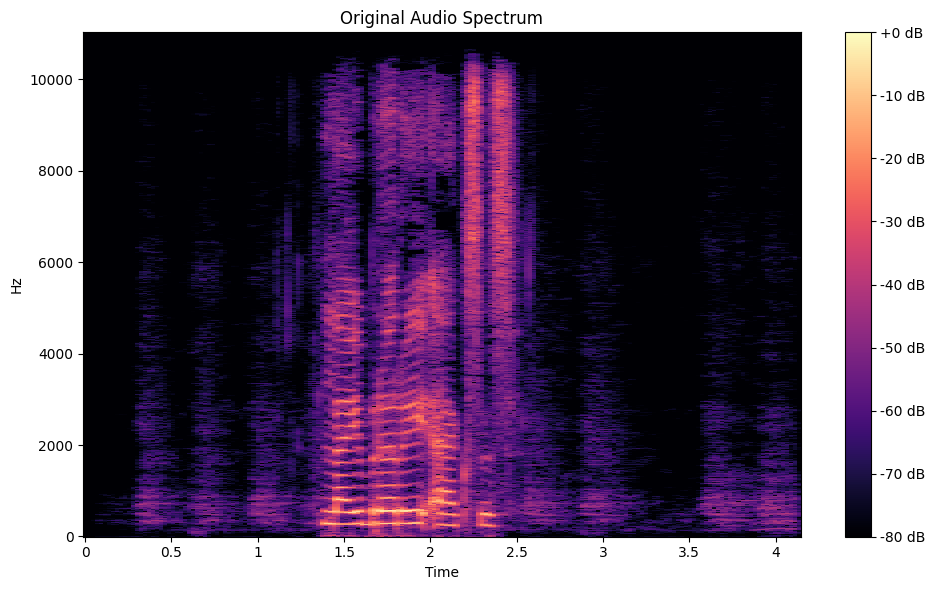

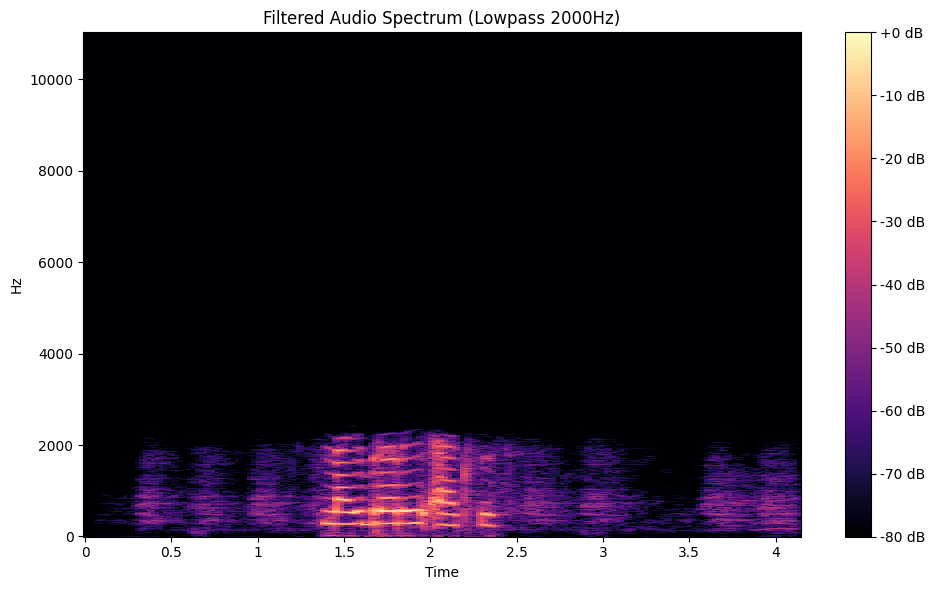

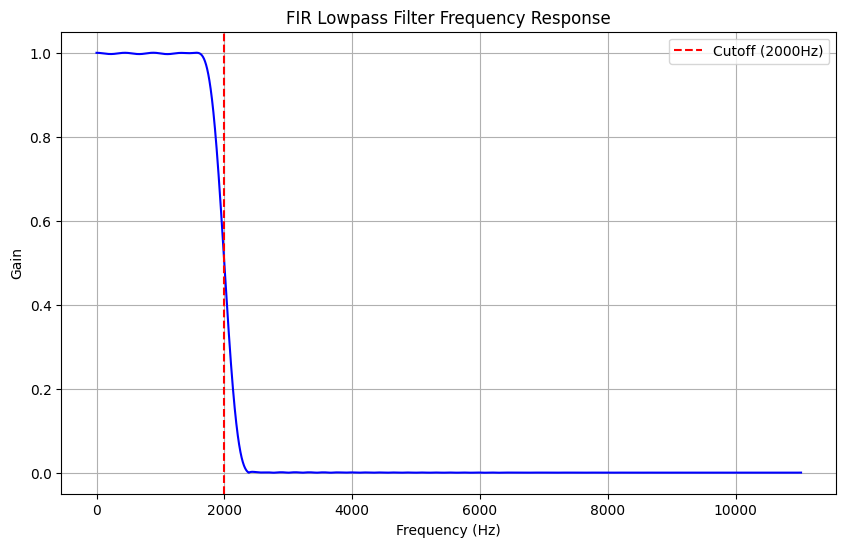

In [27]:
# 1. Load audio file
def load_audio(file_path, sr=22050):
    try:
        audio, sr = librosa.load(file_path, sr=sr)
        print(f"Audio loaded successfully, sampling rate: {sr} Hz, length: {len(audio)} samples")
        return audio, sr
    except Exception as e:
        print(f"Failed to load audio: {str(e)}")
        raise

# 2. Perform spectrum analysis
def plot_spectrum(audio, sr, title="Spectrum"):
    D = librosa.stft(audio)
    D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

    plt.figure(figsize=(10, 6))
    librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()

# 3. Design low-pass FIR filter
def design_lowpass_fir(cutoff_freq, fs, numtaps=101):
    nyquist = fs / 2
    cutoff = cutoff_freq / nyquist
    taps = signal.firwin(numtaps, cutoff, window='hamming', pass_zero='lowpass')
    return taps

# 4. Apply filter to audio
def apply_filter(audio, taps):
    filtered_audio = signal.lfilter(taps, 1.0, audio)
    # Normalize audio data to [-1, 1]
    max_val = np.max(np.abs(filtered_audio))
    if max_val > 0:
        filtered_audio = filtered_audio / max_val
    return filtered_audio

# 5. Play audio
def play_audio(audio, sr, title="Audio"):
    print(f"Playing {title}")
    return ipd.Audio(audio, rate=sr)

def main():
    file_path = "sample_data/mmmm.mov"  # Replace with your audio file path
    sr = 22050  # Sampling rate
    cutoff_freq = 2000  # Low-pass filter cutoff frequency (Hz)
    numtaps = 101  # FIR filter order

    try:
        # Load audio
        audio, sr = load_audio(file_path, sr)

        # Play original audio
        display(play_audio(audio, sr, "Original Audio"))

        # Plot original audio spectrum
        plot_spectrum(audio, sr, title="Original Audio Spectrum")

        # Design low-pass FIR filter
        taps = design_lowpass_fir(cutoff_freq, sr, numtaps)

        # Apply filter
        filtered_audio = apply_filter(audio, taps)

        # Play filtered audio
        display(play_audio(filtered_audio, sr, f"Filtered Audio (Lowpass {cutoff_freq}Hz)"))

        # Plot filtered audio spectrum
        plot_spectrum(filtered_audio, sr, title=f"Filtered Audio Spectrum (Lowpass {cutoff_freq}Hz)")

        # Plot filter frequency response
        w, h = signal.freqz(taps, worN=8000)
        plt.figure(figsize=(10, 6))
        plt.plot(0.5 * sr * w / np.pi, np.abs(h), 'b')
        plt.title('FIR Lowpass Filter Frequency Response')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Gain')
        plt.grid()
        plt.axvline(cutoff_freq, color='r', linestyle='--', label=f'Cutoff ({cutoff_freq}Hz)')
        plt.legend()

        # Save filtered audio
        sf.write('sample_data/filtered_audio.wav', filtered_audio, sr)
        print("Filtered audio saved as 'sample_data/filtered_audio.wav'")

        # Display all plots
        plt.show()

    except FileNotFoundError:
        print("Audio file not found, please check the file path!")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    main()